In [32]:
# Install a pip package in the current Jupyter kernel
import sys
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


"C:\Users\Jean" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [33]:
# Importando algunas librerías que utilizaremos

# Networkx para grafos
import networkx as nx

# Pandas
import pandas as pd

# Mostrar imágenes
from IPython.display import HTML

# Mathplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Encontrando caminos óptimos con grafos

In [34]:
iata_spain = pd.read_csv('grafo.csv')
iata_spain.head()

,code,location,name
0,INI,Inicio,Nodo 0 (Inicio)
1,A,A,Nodo A
2,B,B,Nodo B
3,C,C,Nodo C
4,D,D,Nodo D


In [35]:
iata_spain.set_index(["code"], inplace=True)
iata_spain.head()

,location,name
code,,
INI,Inicio,Nodo 0 (Inicio)
A,A,Nodo A
B,B,Nodo B
C,C,Nodo C
D,D,Nodo D


In [36]:
iata_spain.loc["H"]

location         H
name        Nodo H
Name: H, dtype: object

In [37]:
spain_flights = pd.read_csv("pesos.csv")
spain_flights.head()

,origin,destination,duration,price
0,INI,A,0.0,0
1,INI,B,0.0,0
2,A,C,5.0,5
3,A,D,5.0,5
4,B,E,3.0,3


In [38]:
spain_flights.describe()

,duration,price
count,18.000000,18.000000
mean,3.333333,3.333333
std,1.940285,1.940285
min,0.000000,0.000000
25%,2.000000,2.000000
50%,3.500000,3.500000
75%,4.750000,4.750000
max,7.000000,7.000000


In [39]:
DG=nx.DiGraph()
for row in spain_flights.iterrows():
    DG.add_edge(row[1]["origin"],
                row[1]["destination"],
                duration=row[1]["duration"],
                price=row[1]["price"])

In [40]:
DG.nodes(data=True)

NodeDataView({'INI': {}, 'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'H': {}, 'I': {}, 'J': {}, 'K': {}, 'L': {}, 'FIN': {}})

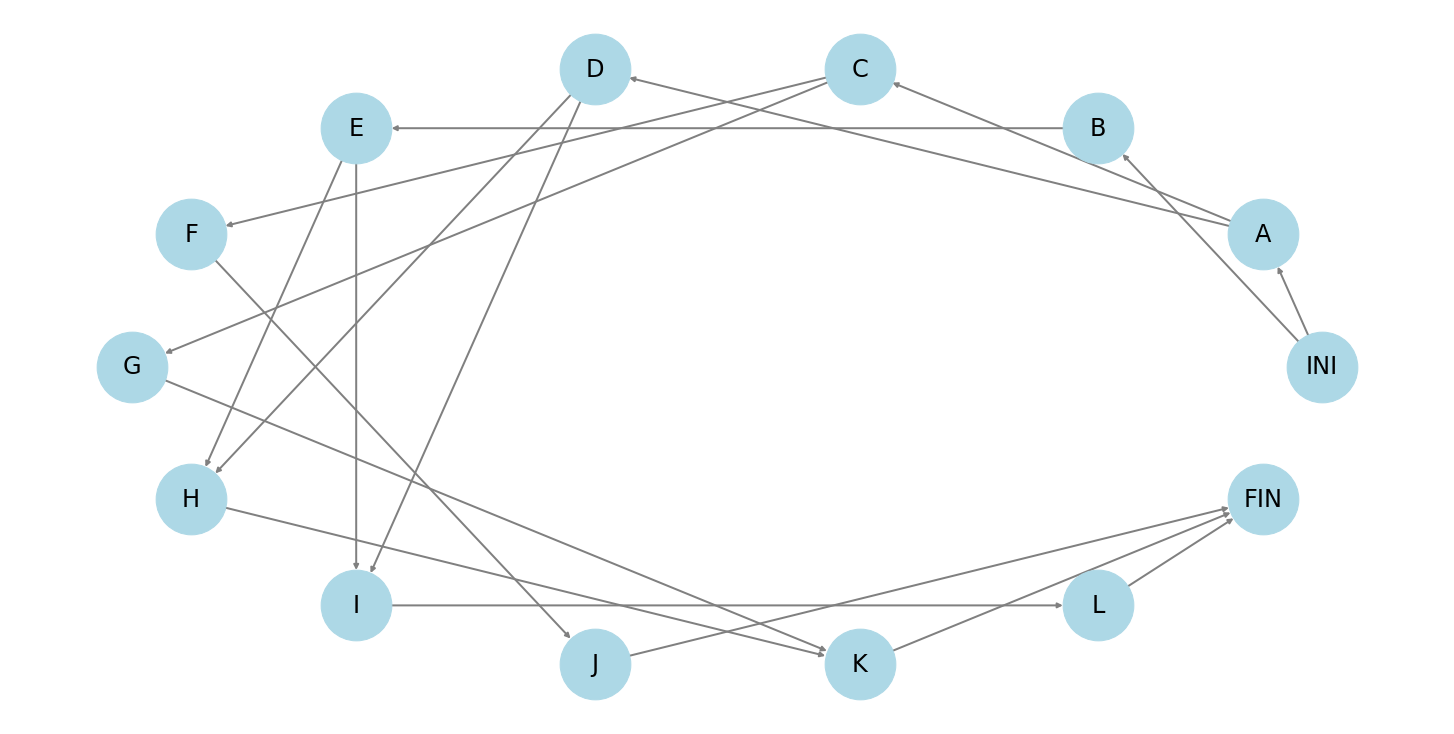

In [41]:
nx.draw_circular(DG,
                 node_color="lightblue",
                 edge_color="gray",
                 font_size=24,
                 width=2, with_labels=True, node_size=5000,
)

In [42]:
list(nx.all_shortest_paths(DG, source="INI", target="FIN", weight=None))

[['INI', 'A', 'C', 'F', 'J', 'FIN'],
 ['INI', 'A', 'C', 'G', 'K', 'FIN'],
 ['INI', 'A', 'D', 'H', 'K', 'FIN'],
 ['INI', 'B', 'E', 'H', 'K', 'FIN'],
 ['INI', 'A', 'D', 'I', 'L', 'FIN'],
 ['INI', 'B', 'E', 'I', 'L', 'FIN']]

In [13]:
# https://en.wikipedia.org/wiki/Dijkstra's_algorithm
print("Dijkstra's algorithm")
HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/2/23/Dijkstras_progress_animation.gif">')

Dijkstra's algorithm


In [43]:
list(nx.dijkstra_path(DG, source="INI", target="FIN", weight=None))

['INI', 'A', 'C', 'F', 'J', 'FIN']

In [44]:
list(nx.dijkstra_path(DG, source="INI", target="FIN", weight="price"))

['INI', 'B', 'E', 'I', 'L', 'FIN']

In [45]:
list(nx.dijkstra_path(DG, source="INI", target="FIN", weight="duration"))

['INI', 'B', 'E', 'I', 'L', 'FIN']

In [18]:
# https://en.wikipedia.org/wiki/A*_search_algorithm
print("A* search algorithm")
HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/5/5d/Astar_progress_animation.gif">')

A* search algorithm


In [46]:
list(nx.astar_path(DG, ("INI"), ("FIN"), weight="price"))

['INI', 'B', 'E', 'I', 'L', 'FIN']

In [47]:
list(nx.astar_path(DG, ("INI"), ("FIN"), weight="duration"))

['INI', 'B', 'E', 'I', 'L', 'FIN']

In [48]:
def show_path(path):
    total_price = 0
    total_duration = 0
    
    for i in range(len(path)-1):
        origin = path[i]
        destination = path[i+1]
        duration = DG[origin][destination]["duration"]
        price = DG[origin][destination]["price"]
        
        total_price = total_price+price
        total_duration = total_duration+duration
        print("    %s -> %s\n    - Duration: %s Price: %s €" % (
            iata_spain.loc[origin]["name"],
            iata_spain.loc[destination]["name"],
            duration, price)
        )
    
    print("\n     Total Duration: %s Total price: %s € \n" % (
            total_duration, total_price)
    )

In [49]:
show_path(['INI', 'B', 'E', 'I', 'L', 'FIN'])

    Nodo 0 (Inicio) -> Nodo B
    - Duration: 0.0 Price: 0 €
    Nodo B -> Nodo E
    - Duration: 3.0 Price: 3 €
    Nodo E -> Nodo I
    - Duration: 3.0 Price: 3 €
    Nodo I -> Nodo L
    - Duration: 2.0 Price: 2 €
    Nodo L -> Nodo -1 (Final)
    - Duration: 7.0 Price: 7 €

     Total Duration: 15.0 Total price: 15 € 



In [50]:
def get_all_shortest_paths(DiGraph, origin, destination):
    print("*** All shortest paths - Origen: %s Destino: %s" % (
        origin, destination
    ))
    for weight in [None, "duration", "price"]:
        print("* Ordenando por: %s" % weight)
        paths = list(nx.all_shortest_paths(DiGraph,
                                          source=origin,
                                          target=destination,
                                          weight=weight))
        for path in paths:
            print("   Camino óptimo: %s" % path)
            show_path(path)
    

In [51]:
get_all_shortest_paths(DG, origin="INI", destination="FIN")

*** All shortest paths - Origen: INI Destino: FIN
* Ordenando por: None
   Camino óptimo: ['INI', 'A', 'C', 'F', 'J', 'FIN']
    Nodo 0 (Inicio) -> Nodo A
    - Duration: 0.0 Price: 0 €
    Nodo A -> Nodo C
    - Duration: 5.0 Price: 5 €
    Nodo C -> Nodo F
    - Duration: 4.0 Price: 4 €
    Nodo F -> Nodo J
    - Duration: 1.0 Price: 1 €
    Nodo J -> Nodo -1 (Final)
    - Duration: 5.0 Price: 5 €

     Total Duration: 15.0 Total price: 15 € 

   Camino óptimo: ['INI', 'A', 'C', 'G', 'K', 'FIN']
    Nodo 0 (Inicio) -> Nodo A
    - Duration: 0.0 Price: 0 €
    Nodo A -> Nodo C
    - Duration: 5.0 Price: 5 €
    Nodo C -> Nodo G
    - Duration: 4.0 Price: 4 €
    Nodo G -> Nodo K
    - Duration: 4.0 Price: 4 €
    Nodo K -> Nodo -1 (Final)
    - Duration: 4.0 Price: 4 €

     Total Duration: 17.0 Total price: 17 € 

   Camino óptimo: ['INI', 'A', 'D', 'H', 'K', 'FIN']
    Nodo 0 (Inicio) -> Nodo A
    - Duration: 0.0 Price: 0 €
    Nodo A -> Nodo D
    - Duration: 5.0 Price: 5 €
    No

In [52]:
def plot_shortest_path(path):
    print(path)
    positions = nx.circular_layout(DG)
    
    nx.draw(DG, pos=positions,
                node_color='lightblue',
                edge_color='gray',
                font_size=24,
                width=1, with_labels=True, node_size=3500, alpha=0.8
           )
    
    short_path=nx.DiGraph()
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
    
    nx.draw(short_path, pos=positions,
                node_color='dodgerblue',
                edge_color='dodgerblue',
                font_size=24,
                width=3, with_labels=True, node_size=3000
           )
    plt.show()
        
    
    

In [53]:
def get_shortest_path(DiGraph, origin, destination):
    print("*** Origen: %s Destino: %s" % (origin, destination))
    
    for weight in [None, "duration", "price"]:
        print(" Ordenado por: %s" % weight)
        path = list(nx.astar_path(DiGraph,
                                  (origin),
                                  (destination),
                                  weight=weight
                                 ))
        print("   Camino óptimo: %s " % path)
        show_path(path)
        plot_shortest_path(path)


*** Origen: INI Destino: FIN
 Ordenado por: None
   Camino óptimo: ['INI', 'A', 'C', 'F', 'J', 'FIN'] 
    Nodo 0 (Inicio) -> Nodo A
    - Duration: 0.0 Price: 0 €
    Nodo A -> Nodo C
    - Duration: 5.0 Price: 5 €
    Nodo C -> Nodo F
    - Duration: 4.0 Price: 4 €
    Nodo F -> Nodo J
    - Duration: 1.0 Price: 1 €
    Nodo J -> Nodo -1 (Final)
    - Duration: 5.0 Price: 5 €

     Total Duration: 15.0 Total price: 15 € 

['INI', 'A', 'C', 'F', 'J', 'FIN']


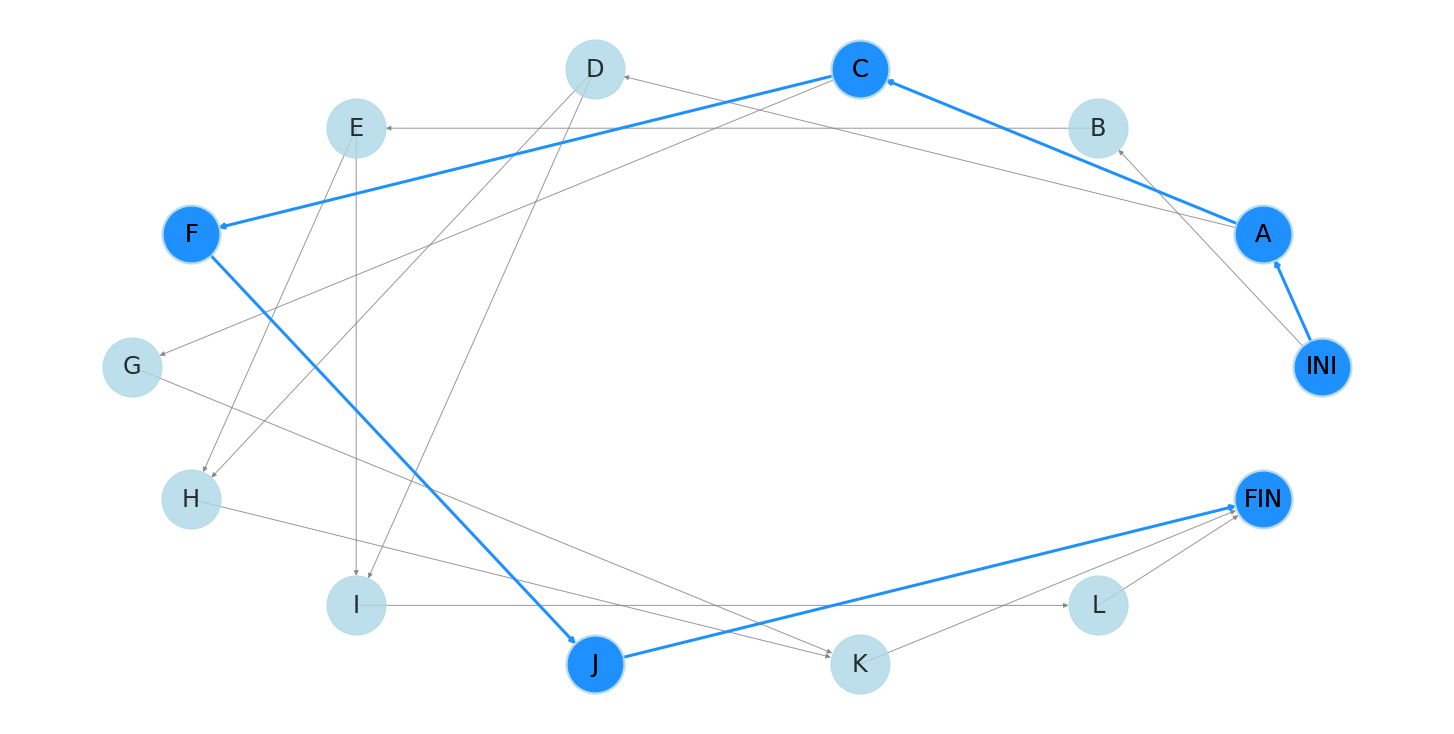

 Ordenado por: duration
   Camino óptimo: ['INI', 'B', 'E', 'I', 'L', 'FIN'] 
    Nodo 0 (Inicio) -> Nodo B
    - Duration: 0.0 Price: 0 €
    Nodo B -> Nodo E
    - Duration: 3.0 Price: 3 €
    Nodo E -> Nodo I
    - Duration: 3.0 Price: 3 €
    Nodo I -> Nodo L
    - Duration: 2.0 Price: 2 €
    Nodo L -> Nodo -1 (Final)
    - Duration: 7.0 Price: 7 €

     Total Duration: 15.0 Total price: 15 € 

['INI', 'B', 'E', 'I', 'L', 'FIN']


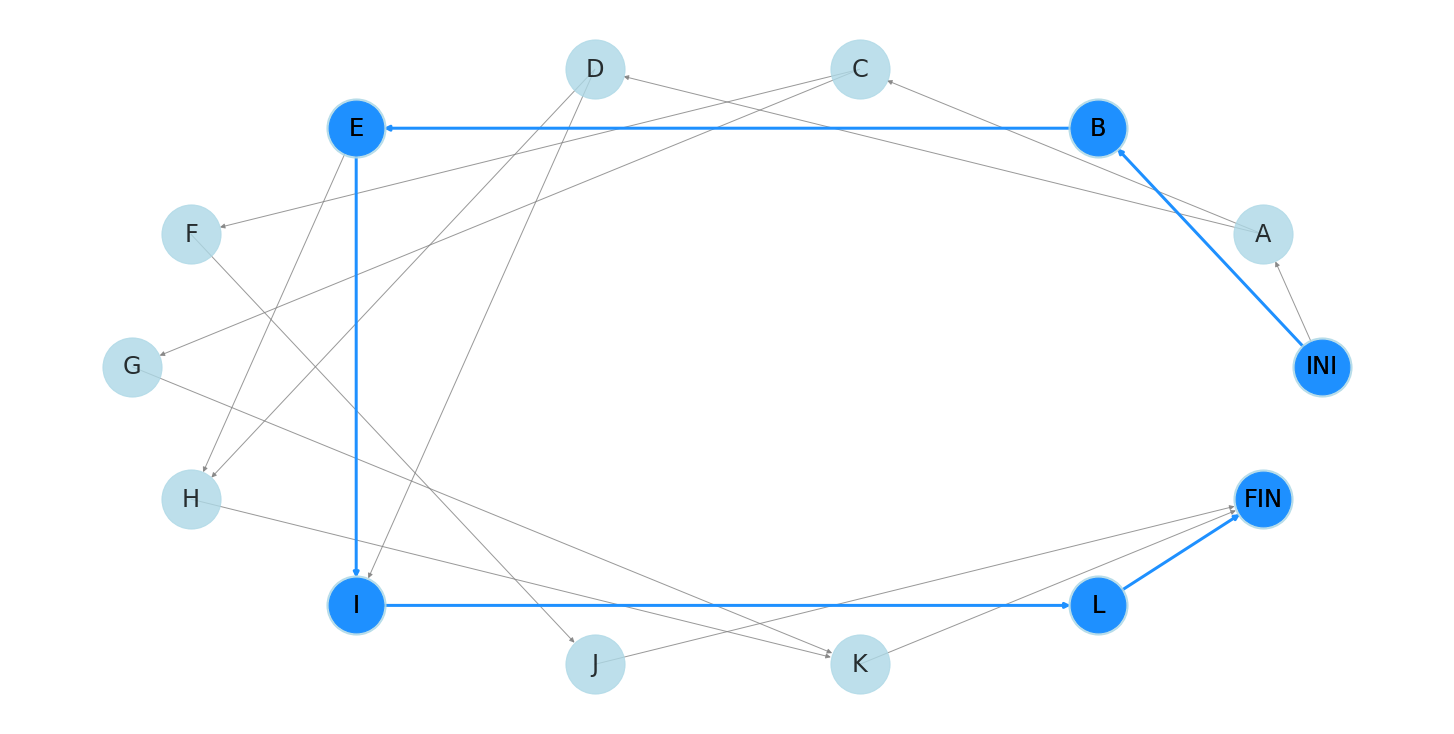

 Ordenado por: price
   Camino óptimo: ['INI', 'B', 'E', 'I', 'L', 'FIN'] 
    Nodo 0 (Inicio) -> Nodo B
    - Duration: 0.0 Price: 0 €
    Nodo B -> Nodo E
    - Duration: 3.0 Price: 3 €
    Nodo E -> Nodo I
    - Duration: 3.0 Price: 3 €
    Nodo I -> Nodo L
    - Duration: 2.0 Price: 2 €
    Nodo L -> Nodo -1 (Final)
    - Duration: 7.0 Price: 7 €

     Total Duration: 15.0 Total price: 15 € 

['INI', 'B', 'E', 'I', 'L', 'FIN']


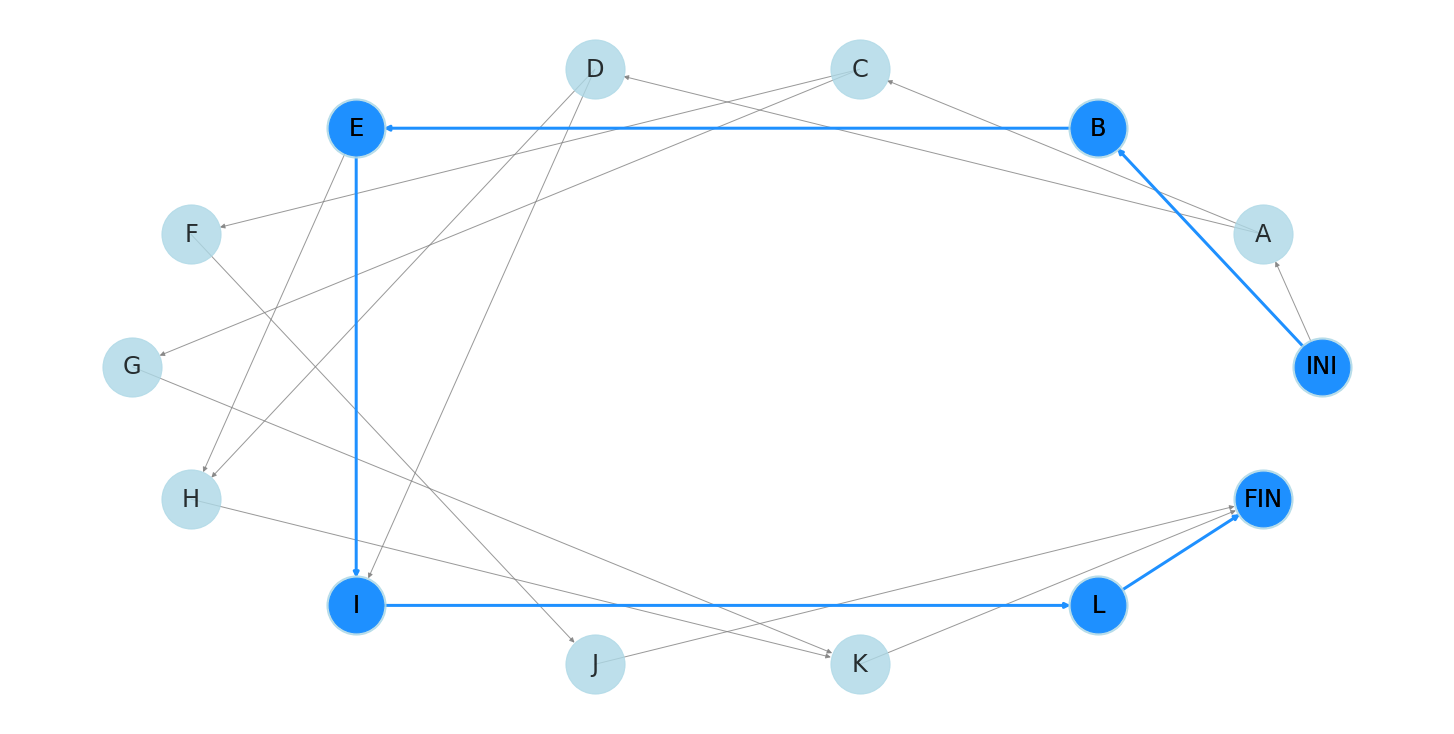

In [54]:
get_shortest_path(DG, origin="INI", destination="FIN")

['INI', 'A', 'C', 'F', 'J', 'FIN']


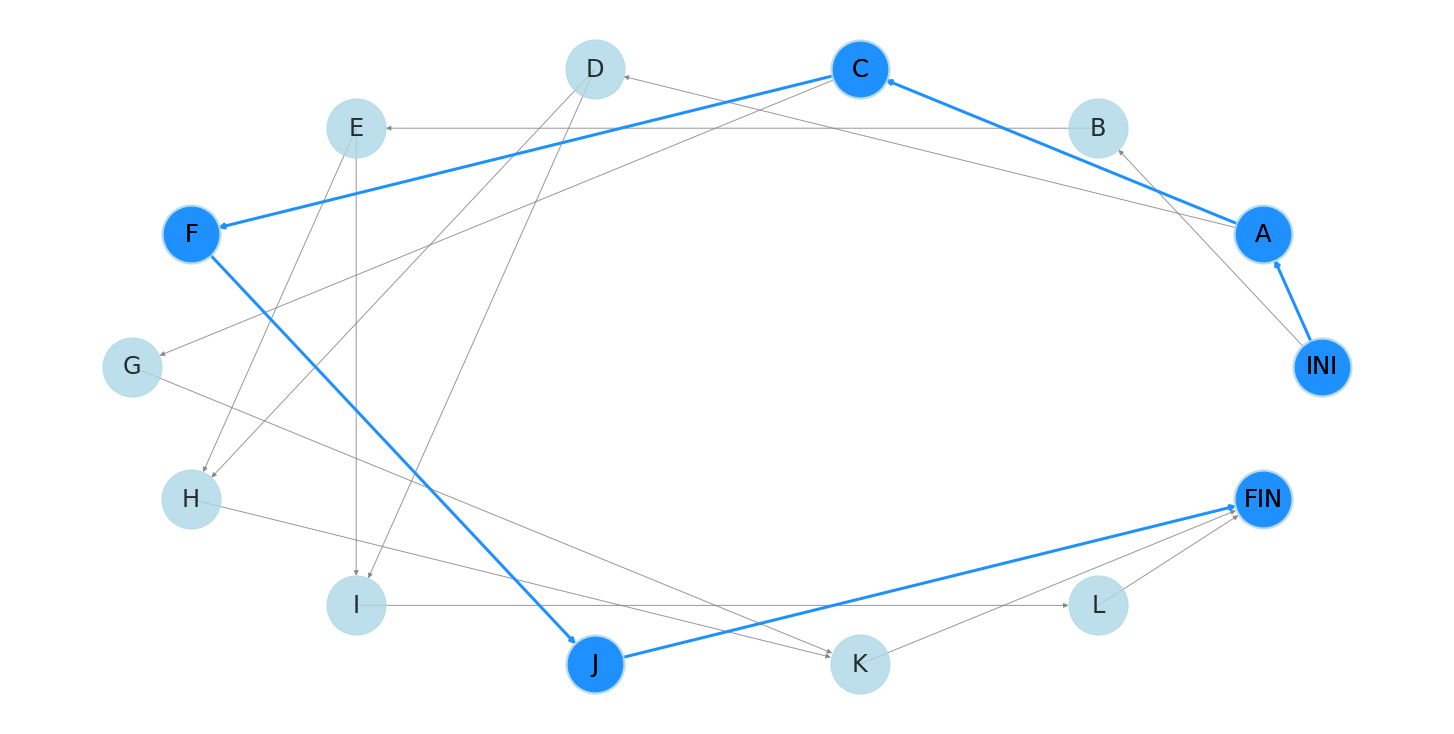

In [56]:
path = ['INI', 'A', 'C', 'F', 'J', 'FIN']
plot_shortest_path(path)

*** Origen: INI Destino: FIN
 Ordenado por: None
   Camino óptimo: ['INI', 'A', 'C', 'F', 'J', 'FIN'] 
    Nodo 0 (Inicio) -> Nodo A
    - Duration: 0.0 Price: 0 €
    Nodo A -> Nodo C
    - Duration: 5.0 Price: 5 €
    Nodo C -> Nodo F
    - Duration: 4.0 Price: 4 €
    Nodo F -> Nodo J
    - Duration: 1.0 Price: 1 €
    Nodo J -> Nodo -1 (Final)
    - Duration: 5.0 Price: 5 €

     Total Duration: 15.0 Total price: 15 € 

['INI', 'A', 'C', 'F', 'J', 'FIN']


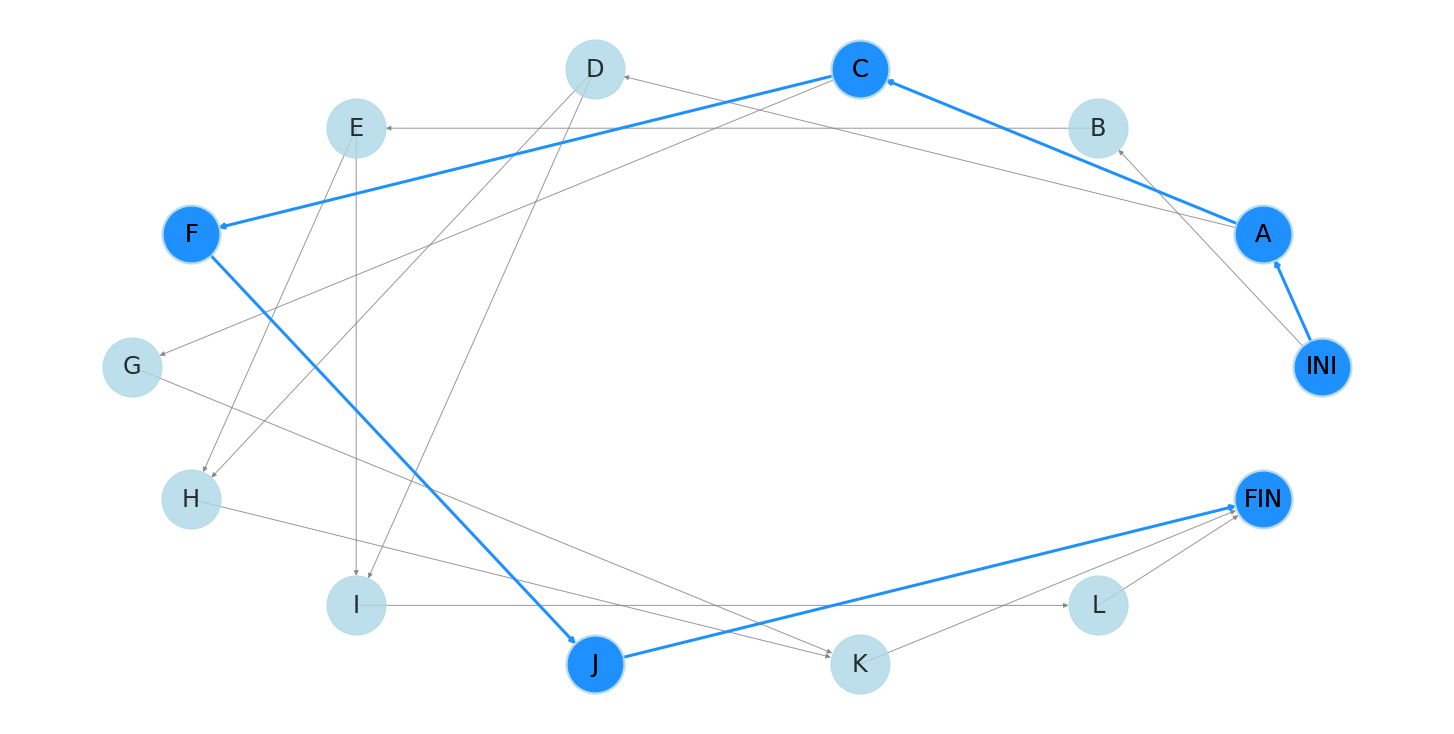

 Ordenado por: duration
   Camino óptimo: ['INI', 'B', 'E', 'I', 'L', 'FIN'] 
    Nodo 0 (Inicio) -> Nodo B
    - Duration: 0.0 Price: 0 €
    Nodo B -> Nodo E
    - Duration: 3.0 Price: 3 €
    Nodo E -> Nodo I
    - Duration: 3.0 Price: 3 €
    Nodo I -> Nodo L
    - Duration: 2.0 Price: 2 €
    Nodo L -> Nodo -1 (Final)
    - Duration: 7.0 Price: 7 €

     Total Duration: 15.0 Total price: 15 € 

['INI', 'B', 'E', 'I', 'L', 'FIN']


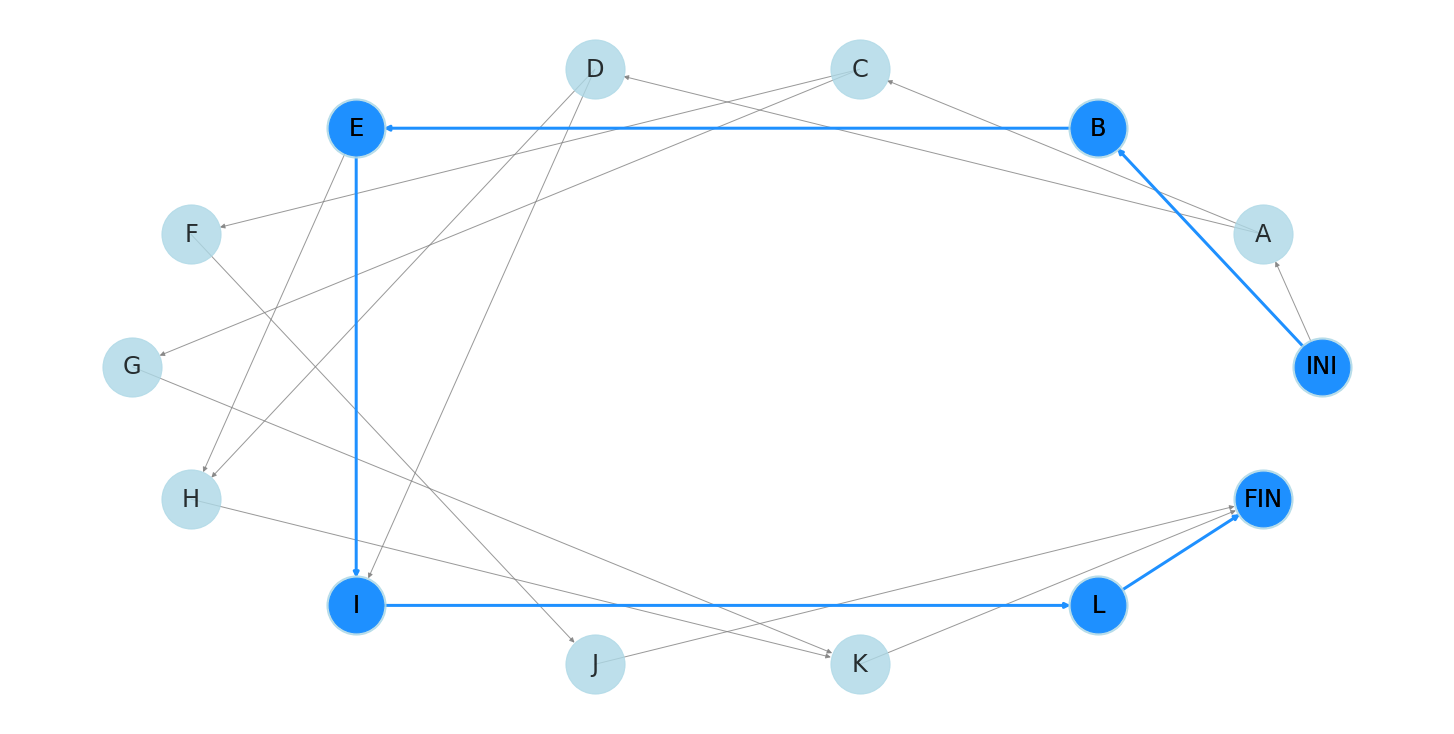

 Ordenado por: price
   Camino óptimo: ['INI', 'B', 'E', 'I', 'L', 'FIN'] 
    Nodo 0 (Inicio) -> Nodo B
    - Duration: 0.0 Price: 0 €
    Nodo B -> Nodo E
    - Duration: 3.0 Price: 3 €
    Nodo E -> Nodo I
    - Duration: 3.0 Price: 3 €
    Nodo I -> Nodo L
    - Duration: 2.0 Price: 2 €
    Nodo L -> Nodo -1 (Final)
    - Duration: 7.0 Price: 7 €

     Total Duration: 15.0 Total price: 15 € 

['INI', 'B', 'E', 'I', 'L', 'FIN']


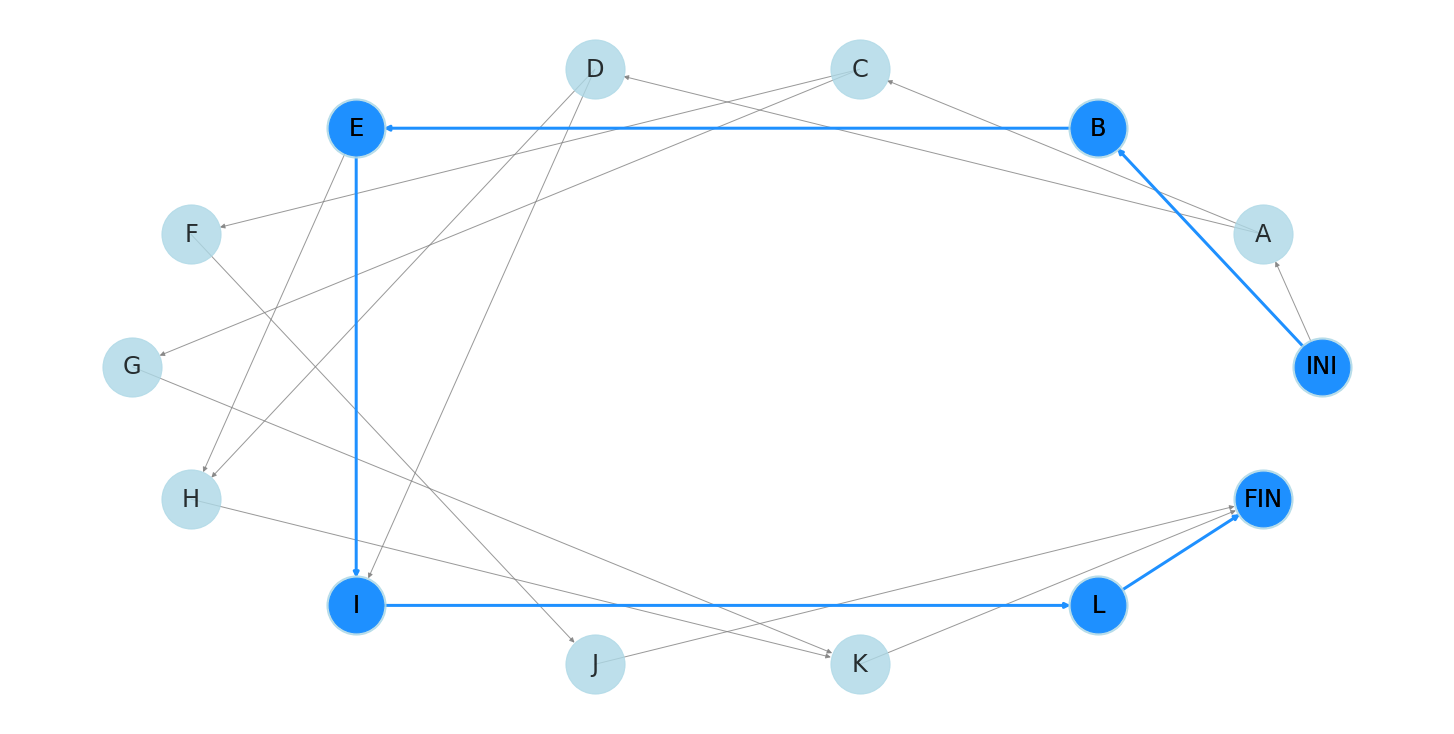

In [57]:
get_shortest_path(DG, origin="INI", destination="FIN")